## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import os, sys
sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))

/Users/Tony/Other Docs/distilling-and-forgetting-in-large-pre-trained-models


In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta

sns.set_theme(context="paper", style="ticks")

OUTPUT_DIR = Path("notebooks/outputs/other_figures/")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
df = pd.read_csv("notebooks/data/others/large_pretrained_asr_evolution.csv", parse_dates=["date"])
df

,name,size,date
0,Wav2Vec,34,2019-09-11
1,Mockingjay,85,2019-10-25
2,Conformer,118,2020-05-16
3,Wav2Vec2,317,2020-10-22
4,Hubert,317,2021-06-14
5,w2v-BERT,1000,2021-08-07
6,BigSSL,8000,2021-09-27
7,WavLM,317,2021-10-26
8,XLS-R,2000,2021-11-17
9,Whisper,1550,2022-09-21


Figure saved at `notebooks/outputs/other_figures/large_pretrained_asr_evolution.png`.


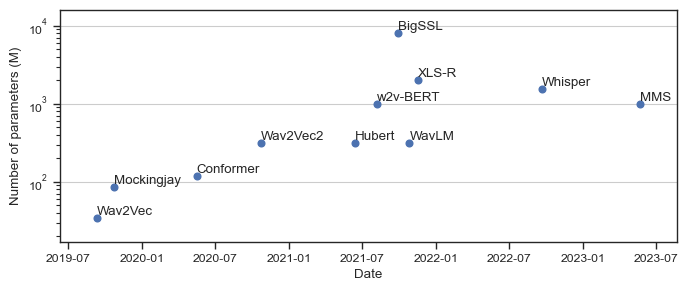

In [35]:
figsize = (7, 3)

# Plot:
fig, ax = plt.subplots(figsize=(figsize))

ax.plot(df['date'], df['size'], 'o')
for i, txt in enumerate(df['name']):
    ax.annotate(txt, (df['date'][i], df['size'][i]), (df['date'][i], 1.1*df['size'][i]))

ax.set_xlim(df['date'].min() - relativedelta(months=3), df['date'].max() + relativedelta(months=3))
ax.set_ylim(0.5*df["size"].min(), 2*df["size"].max())
ax.set_xlabel("Date")
ax.set_ylabel("Number of parameters (M)")
ax.set_yscale("log")
ax.yaxis.grid(True)

fig.tight_layout()

# Save figure:
savepath = OUTPUT_DIR / "large_pretrained_asr_evolution.png"
savepath.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(savepath)
print(f"Figure saved at `{savepath}`.")